In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import collections

In [2]:
data = pd.read_table('data.txt', sep="\t", header=None)
movies = pd.read_table('movies.txt', sep="\t", header=None)

In [ ]:
#Visualization #2 (10 most common movies)

In [14]:
counter=collections.Counter(data[1])
ten_most = (counter.most_common(10))
print(ten_most)

[(50, 583), (258, 509), (100, 508), (181, 507), (294, 485), (286, 481), (288, 478), (1, 452), (300, 431), (121, 429)]


In [25]:
movie_ids = {}
for tuples in ten_most:
    rating = []
    movieid = tuples[0]
    for row_ind in range(len(data):
        if data.iloc[row_ind][1] == movieid:
            rating.append(data.iloc[row_ind][2])
    movie_ids[movieid] = rating

In [169]:
ids = []
dist = []
for m_id, arr in movie_ids.items():
    dist.append(list(np.bincount(arr)/np.sum(np.bincount(arr)))[1:6])
    ids.append(m_id)

In [105]:
df = np.concatenate((np.transpose([np.array(ids)]), dist), axis = 1)

In [55]:
pal = sns.color_palette("Spectral", n_colors = 10).as_hex()


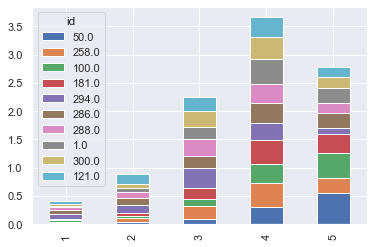

In [114]:
sns.set()
data.set_index('id').T.plot(kind = "bar", stacked = True)

In [171]:
# Data
data = pd.DataFrame(columns = [1, 2, 3, 4, 5], index = ids, data = np.array(dist))
data = data.T 

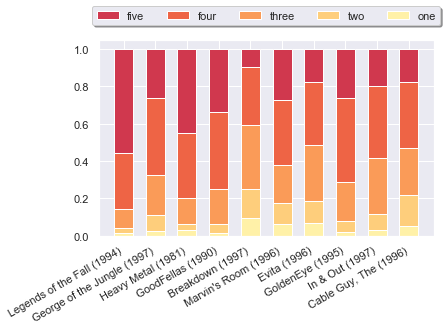

In [241]:
names = []
for i in range(10):
    names.append(movies.iloc[ids[i], 1])

ones = data.iloc[0, :].values
two = data.iloc[1, :].values
three = data.iloc[2, :].values
four = data.iloc[3, :].values
five = data.iloc[4, :].values
fig = plt.figure()
ax = plt.subplot(111)
ax.set_xticks([0,1,2,3,4,5,6,7,8,9])
ax.set_xticklabels(names)
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')

plt.bar(names, five, width=0.6, label='five', color=pal[0], bottom=ones+two+three+four)
plt.bar(names, four, width=0.6, label='four', color=pal[1], bottom=ones+two+three)
plt.bar(names, three, width=0.6, label='three', color=pal[2], bottom=ones+two)
plt.bar(names, two, width=0.6, label='two', color=pal[3], bottom=ones)
plt.bar(names, ones, width=0.6, label='one', color=pal[4])
# Shrink current axis's height by 10% on the bottom
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

# Put a legend below current axis
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),
          fancybox=True, shadow=True, ncol=5)
plt.savefig("Visualization2.png")

In [237]:
names

['Legends of the Fall (1994)',
 'George of the Jungle (1997)',
 'Heavy Metal (1981)',
 'GoodFellas (1990)',
 'Breakdown (1997)',
 "Marvin's Room (1996)",
 'Evita (1996)',
 'GoldenEye (1995)',
 'In & Out (1997)',
 'Cable Guy, The (1996)']

In [209]:
movies.iloc[ids[0], 1]

'Legends of the Fall (1994)'

In [ ]:
#Visualizations 3

In [8]:
data = pd.read_table('data.txt', sep="\t", header=None)
movies = pd.read_table('movies.txt', sep="\t", header=None)

In [9]:
all_rating = {}
for row_ind in range(len(data)):
    rating = data.iloc[row_ind][2]
    if data.iloc[row_ind][1] not in all_rating.keys():
        all_rating[data.iloc[row_ind][1]] = [rating]
    else:
        all_rating[data.iloc[row_ind][1]].append(rating)

In [247]:
average_ratings = {}
for key, value in all_rating.items():
    average_ratings[key] = np.average(value)

In [264]:
sorted_x = sorted(average_ratings.items(), key=lambda kv: kv[1])[-11 : -1]


In [260]:
ids = []
for x, y in sorted_x:
    ids.append(x)

In [265]:
sorted_x

[(1449, 4.625),
 (1189, 5.0),
 (1500, 5.0),
 (814, 5.0),
 (1536, 5.0),
 (1293, 5.0),
 (1599, 5.0),
 (1653, 5.0),
 (1467, 5.0),
 (1122, 5.0)]

In [267]:
movie_ids = {}
for tuples in sorted_x:
    rating = []
    movieid = tuples[0]
    for row_ind in range(len(data)):
        if data.iloc[row_ind][1] == movieid:
            rating.append(data.iloc[row_ind][2])
    movie_ids[movieid] = rating

In [268]:
movie_ids

{1449: [4, 5, 5, 5, 4, 5, 4, 5],
 1189: [5, 5, 5],
 1500: [5, 5],
 814: [5],
 1536: [5],
 1293: [5, 5, 5],
 1599: [5],
 1653: [5],
 1467: [5, 5],
 1122: [5]}

In [269]:
ids = []
dist = []
for m_id, arr in movie_ids.items():
    dist.append(list(np.bincount(arr)/np.sum(np.bincount(arr)))[1:6])
    ids.append(m_id)

In [271]:
# Data
data = pd.DataFrame(columns = [1, 2, 3, 4, 5], index = ids, data = np.array(dist))
data = data.T 

In [272]:
data

,1449,1189,1500,814,1536,1293,1599,1653,1467,1122
1,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.625,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


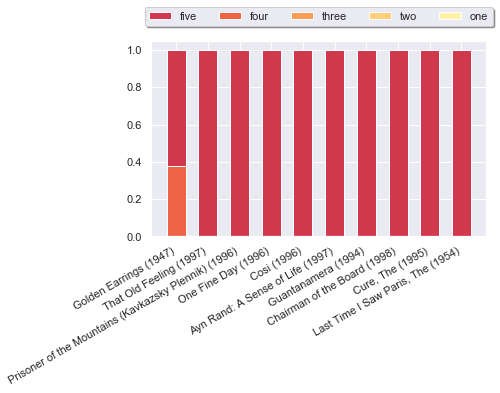

In [274]:
names = []
for i in range(10):
    names.append(movies.iloc[ids[i], 1])

ones = data.iloc[0, :].values
two = data.iloc[1, :].values
three = data.iloc[2, :].values
four = data.iloc[3, :].values
five = data.iloc[4, :].values
fig = plt.figure()
ax = plt.subplot(111)
ax.set_xticks([0,1,2,3,4,5,6,7,8,9])
ax.set_xticklabels(names)
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')

plt.bar(names, five, width=0.6, label='five', color=pal[0], bottom=ones+two+three+four)
plt.bar(names, four, width=0.6, label='four', color=pal[1], bottom=ones+two+three)
plt.bar(names, three, width=0.6, label='three', color=pal[2], bottom=ones+two)
plt.bar(names, two, width=0.6, label='two', color=pal[3], bottom=ones)
plt.bar(names, ones, width=0.6, label='one', color=pal[4])
# Shrink current axis's height by 10% on the bottom
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

# Put a legend below current axis
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),
          fancybox=True, shadow=True, ncol=5)
plt.savefig("Visualization3.png")

In [3]:
#Visualizations 4

In [4]:
new_data = pd.read_table('data.txt', sep="\t", header = None)
movies = pd.read_table('movies.txt', sep="\t", header = None)

In [16]:
movies

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,1,Toy Story (1995),0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
#7, 15, 16 (Comedy, mystery, romance)
movie_id = movies.iloc[:, 0]
comedy = movies.iloc[:, 7]
mystery = movies.iloc[:, 15]
romance = movies.iloc[:, 16]


In [6]:
comedy_id = np.array(np.where(comedy == 1)) + 1
mystery_id = np.array(np.where(mystery == 1)) + 1
romance_id = np.array(np.where(romance == 1)) + 1


In [10]:
comedies = []
mysteries = []
romances = []
for movie_id in comedy_id[0]:
    comedies.extend(all_rating[movie_id])
for movie_id in mystery_id[0]:
    mysteries.extend(all_rating[movie_id])
for movie_id in romance_id[0]:
    romances.extend(all_rating[movie_id])

In [32]:
#Choose ten movies from each genre and output them to txt file, -1 from movie index because we want 0-indexed
comedy_name = []
for id_ in comedy_id[0]:
    comedy_name.append(movies.iloc[id_ - 1][1])
mystery_name = []
for id_ in mystery_id[0]:
    mystery_name.append(movies.iloc[id_ - 1][1])
romance_name = []
for id_ in romance_id[0]:
    romance_name.append(movies.iloc[id_ - 1][1])

In [52]:
df = pd.DataFrame(list(zip(comedy_id[0] - 1, comedy_name)))

In [55]:
df.to_csv(r'comedies.txt', sep=',', header = None, index = None)

In [63]:
df = pd.DataFrame(list(zip(comedy_id[0] - 1, comedy_name)), columns = ['id', 'name'])

In [69]:
ids = [0, 94, 992, 7, 20, 162, 172, 1114, 658, 476]
ten_comedies = df[df['id'].isin(ids)]
ten_comedies.to_csv(r'ten_comedies.txt', sep=',', header = None, index = None)

In [70]:
df = pd.DataFrame(list(zip(mystery_id[0] - 1, mystery_name)))
df.to_csv(r'mysteries.txt', sep=',', header = None, index = None)
df = pd.DataFrame(list(zip(mystery_id[0] - 1, mystery_name)), columns = ['id', 'name'])

In [71]:
ids = [123, 134, 478, 504, 1100, 1158, 586, 404, 301, 311]
ten_mysteries = df[df['id'].isin(ids)]
ten_mysteries.to_csv(r'ten_mysteries.txt', sep=',', header = None, index = None)

In [72]:
df = pd.DataFrame(list(zip(romance_id[0] - 1, romance_name)))
df.to_csv(r'romances.txt', sep=',', header = None, index = None)
df = pd.DataFrame(list(zip(romance_id[0] - 1, romance_name)), columns = ['id', 'name'])

In [73]:
ids = [541, 464, 606, 738, 739, 206, 1023, 49, 282, 450]
ten_romances = df[df['id'].isin(ids)]
ten_romances.to_csv(r'ten_romances.txt', sep=',', header = None, index = None)

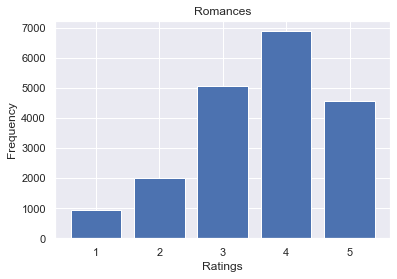

In [411]:
plt.bar(x = [1, 2, 3, 4, 5], height = np.bincount(romances)[1:6])
plt.xlabel("Ratings")
plt.ylabel("Frequency")
plt.title("Romances")
plt.savefig("Romances.png")

In [352]:
data = data.fillna(0)

In [362]:
len(data.iloc[0, :].values)

5

ValueError: shape mismatch: objects cannot be broadcast to a single shape

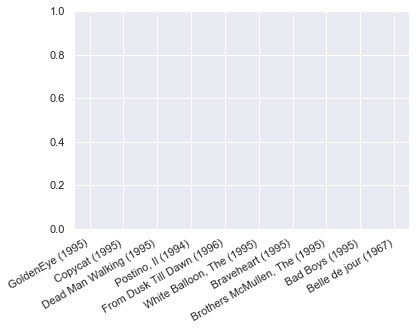

In [359]:
names = []
for i in range(len(data)):
    names.append(movies.iloc[com_id[i], 1])

ones = data.iloc[0, :].values
two = data.iloc[1, :].values
three = data.iloc[2, :].values
four = data.iloc[3, :].values
five = data.iloc[4, :].values
fig = plt.figure()
ax = plt.subplot(111)
ax.set_xticks([0,1,2,3,4,5,6,7,8,9])
ax.set_xticklabels(names)
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')

plt.bar(names, five, width=0.6, label='five', color=pal[0], bottom=ones+two+three+four)
plt.bar(names, four, width=0.6, label='four', color=pal[1], bottom=ones+two+three)
plt.bar(names, three, width=0.6, label='three', color=pal[2], bottom=ones+two)
plt.bar(names, two, width=0.6, label='two', color=pal[3], bottom=ones)
plt.bar(names, ones, width=0.6, label='one', color=pal[4])
# Shrink current axis's height by 10% on the bottom
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

# Put a legend below current axis
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),
          fancybox=True, shadow=True, ncol=5)
#plt.savefig("Visualization3.png")

In [381]:
years = {}
for index in range(len(movies)):
    title = movies.iloc[index, 1]
    if title != "unknown":
        movie_id = movies.iloc[index, 0]
        year = title[-5:-1]
        years[movie_id] = int(year)

ValueError: invalid literal for int() with base 10: '995)'

In [382]:
movies.iloc[index, 1]

'Heidi Fleiss: Hollywood Madam (1995) '

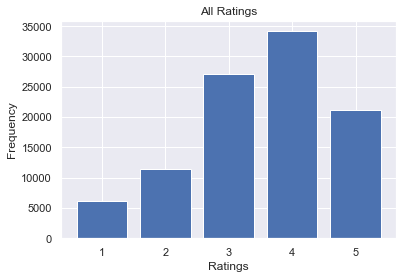

In [412]:
plt.bar(x = [1, 2, 3, 4, 5], height = np.bincount(new_data[2])[1:6])
plt.xlabel("Ratings")
plt.ylabel("Frequency")
plt.title("All Ratings")
plt.savefig("Visualization1.png")